<a href="https://colab.research.google.com/github/sherri-ice/DataAnalyseProject/blob/zodiac/vkiad_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021/12/05 12:48:57 AM GMT+3,Мужской,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Экстраверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
230,2021/12/05 1:45:07 PM GMT+3,Женский,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Нет,Да,"Да, до поступления",Не хожу в библиотеку,Амбиверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
231,2021/12/05 8:54:15 PM GMT+3,Женский,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел",Не хожу в библиотеку,Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
232,2021/12/06 3:36:11 AM GMT+3,Мужской,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [ ]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [ ]:
data_frame = data_frame.drop('time', axis = 1)

В некотрых столбцах заменим данные типа Да/Нет на True/False. Помимо этого для столбца `covid19` в опросе уточнялось, когда именно вы болели: до поступления или во время вашего студенчества. Мы решаем, что нам важнее просто информация о том, болел ли человек, поэтому заменяем оба этих варианта на True.

In [ ]:
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Да, во время студенчества', 'Да, до поступления', 'Да', 
                                                                                                                           'Да, на всю страну такой один'], True)
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Нет, не болел', 'Нет', 'Нет('], False)

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [ ]:
data_frame.gender

0      Предпочитаю не говорить (подаюсь в гугл)
1      Предпочитаю не говорить (подаюсь в гугл)
2                                       Мужской
3                                       Женский
4                                       Мужской
                         ...                   
229                                     Мужской
230                                     Женский
231                                     Женский
232                                     Мужской
233                                     Женский
Name: gender, Length: 234, dtype: object

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [ ]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [ ]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Уникальные поля до замены  [nan 'm' 'f']
Уникальные поля после замены части Nan-ов  ['m' 'f' nan]
Уникальные поля после замены всех некорректных данных  ['m' 'f']


Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

<BarContainer object of 15 artists>

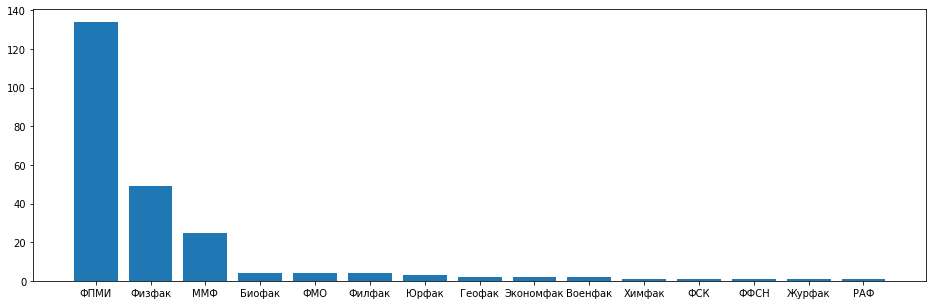

In [ ]:
plt.figure(figsize=(16, 5))
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts())

In [ ]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,False
1,m,ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре",Платно,1-5 пересдач,False
2,m,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Интроверт,False,True,False,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
3,f,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,True,True,False,"Редко, 1-2 раза в месяц",Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),True
4,m,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,m,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Экстраверт,True,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
230,f,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,False,True,True,Не хожу в библиотеку,Амбиверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
231,f,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,True,True,False,Не хожу в библиотеку,Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
232,m,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,True,True,True,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,False


# Анализ успеваемости

Для начала посмотрим на результаты по успеваемости опроса и найдем среднюю успеваемость.

<BarContainer object of 5 artists>

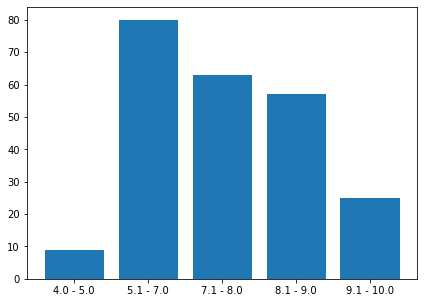

In [ ]:
plt.figure(figsize=(7, 5))
grades = data_frame.average_grade.value_counts()
grades = grades.reindex(['4.0 - 5.0', '5.1 - 7.0','7.1 - 8.0', '8.1 - 9.0', '9.1 - 10.0'])
plt.xticks(np.arange(grades.index.size), grades.index)
plt.bar(range(data_frame.average_grade.unique().size), grades)

Так уж вышло, что данные по успеваемости были собраны в интервальном виде, а не в численном. Единственное, что мы пока можем сказать, это то, что наиболее часто встречающийся интервал по успеваемости [5.1 - 7.0]. Даже сказать, что данные по успеваемости обладают положительной ассиметрией будет неправильно, хоть и хочется так сделать, смотря на график.
Существуют специальные формулы, позволяющие вычислить моду, медиану и среднее для интервальных данных. Формула для вычисления моды:

$$ M = x_{M_0} + \frac{f_{M_0} - f_{M_0 - 1}}{(f_{M_0} - f_{M_0 - 1}) + (f_{M_0} - f_{M_0 + 1})} \cdot i_{M_0}$$ где $x_{M_0}$ - нижняя граница модального интервала,

$i_{M_0}$ - длина модального интервала,

$f_{M_0}$ - частота модального интервала,

$f_{M_0 - 1}$ - частота предыдущего интервала,

$f_{M_0 + 1}$ - частота следующего интервала.

Формула для вычисления медианы:

$$m = x_{M_0} + \frac{0.5n - N_{M_0 - 1}}{n_{M_0}} \cdot i_{M_0}$$

где $n$ - объем выборочной совокупности,

$x_{M_0}$ - нижняя граница медианного интервала,

$i_{M_0}$ - длина медианного интервала,

$n_{M_0}$ - частота медианного интервала,

$N_{M_0 - 1}$ - накопленная частота предыдущего интервала.

Для нахождения среднего, дисперсии и коэффициента ассиметрии каждый интервал заменяется на свою середину.







Усредним каждый интервал, найдем частоту и накопленную частоту для каждого интервала.

In [ ]:
averaged_grades = {}
for i in grades.index:
  averaged_grades[i] = averaged_grades.get(i, 0) + (float(i.split(' - ')[0]) + float(i.split(' - ')[1]))/2

averaged_grades = DataFrame(Series(averaged_grades), columns = ['averaged_interval'])


frequency = np.array(grades)
accumulated_frequency = np.arange(5)
sum = 0
i = 0
for num in frequency:
  sum += num
  accumulated_frequency[i] = sum
  i += 1

averaged_grades['frequency'] = frequency
averaged_grades['accumulated_frequency'] = accumulated_frequency

print(averaged_grades)

averaged_grades_in_array = []

averaged_grades.loc['4.0 - 5.0']['frequency']

for i in averaged_grades.index:
  averaged_grades_in_array = np.append(averaged_grades_in_array, np.repeat(averaged_grades.loc[i]['averaged_interval'], averaged_grades.loc[i]['frequency']))


            averaged_interval  frequency  accumulated_frequency
4.0 - 5.0                4.50          9                      9
5.1 - 7.0                6.05         80                     89
7.1 - 8.0                7.55         63                    152
8.1 - 9.0                8.55         57                    209
9.1 - 10.0               9.55         25                    234


Наш модальный интервал: 5.1 - 7.0. Длина модального интервала: 1,9. Наш медианный интервал: 7.1 - 8.0. Длина медианного интервала: 0.9.

In [ ]:
i = 1
moda = 5.1 + 1.9 * (averaged_grades.iloc[i]['frequency'] - averaged_grades.iloc[i - 1]['frequency']) / (2 * averaged_grades.iloc[i]['frequency'] - 
                                                                                                        averaged_grades.iloc[i - 1]['frequency'] - averaged_grades.iloc[i + 1]['frequency'])
print('Мода ', moda)
j = 2
median = 5.1 + 1.9 * (0.5 * len(averaged_grades_in_array) - averaged_grades.iloc[j - 1]['accumulated_frequency']) / averaged_grades.iloc[j]['frequency']
print('Медиана ', median)
mean = np.mean(averaged_grades_in_array)
print('Среднее значение ', mean)
print('Выборочная дисперсия ', np.var(averaged_grades_in_array))
std = np.std(averaged_grades_in_array)
print('Выборочное среднее квадратическое отклонение ', std)
numerator = 1. / len(averaged_grades_in_array) * np.sum((averaged_grades_in_array - mean) ** 3)
denominator = (1. / len(averaged_grades_in_array) * np.sum((averaged_grades_in_array - mean) ** 2)) ** 1.5
skewness = numerator / denominator
print('Коэффициент ассиметрии: ', skewness)

Мода  6.632954545454545
Медиана  5.944444444444444
Среднее значение  7.37713675213675
Выборочная дисперсия  1.7680776992475717
Выборочное среднее квадратическое отклонение  1.3296908284438047
Коэффициент ассиметрии:  -0.0955926285840622


Полученная статистика показывает, что наши данные в принципе очень близки к нормальному распредлению.

Нормальное распределение в `numpy` на таком же размере массива даёт близкую к нашей разницу между модей, медианой и средним и так же дает ненулевой коэффициент ассиметрии.

In [ ]:
normal = np.random.rand(len(averaged_grades_in_array))
print('Мода ', normal[np.argmax(np.unique(normal, return_counts=True)[0])])
print('Медиана ', np.median(normal))
print('Среднее значение ', np.mean(normal))
numerator = 1. / len(normal) * np.sum((normal - np.mean(normal)) ** 3)
denominator = (1. / len(normal) * np.sum((normal - np.mean(normal)) ** 2)) ** 1.5
skewness = numerator / denominator
print('Коэффициент ассиметрии: ', skewness)

Мода  0.5949235335933931
Медиана  0.49278861860892215
Среднее значение  0.49531563995928257
Коэффициент ассиметрии:  0.027657943217916602


# Анализ влияния формы обучения на успеваемость студента

Мы хотели изучить зависимость между успеваемостью студентов, количеством пересдач и обучением на платной или бесплатной основе.

In [ ]:
education_type = data_frame.education_type.value_counts()

In [ ]:
failed_exams = data_frame.failed_exams.value_counts()
print('Процент студентов, получавших пересдачи:', (failed_exams.loc['1-5 пересдач'] + failed_exams.loc['Больше 5 пересдач']) / len(data_frame.failed_exams) * 100, '%')
print('Процент студентов, получивших больше 5 пересдач:', failed_exams.loc['Больше 5 пересдач'] / len(data_frame.failed_exams) * 100, '%')

Процент студентов, получавших пересдачи: 21.367521367521366 %
Процент студентов, получивших больше 5 пересдач: 2.9914529914529915 %


Найдем приблизительный средний балл успеваемости для разных групп студентов по типу обучения. При этом объединять "бесплатников" не будем.

In [ ]:
education_type_and_grades = data_frame.groupby(by = ['education_type'])['average_grade'].value_counts()
education_type_and_grades

mean_grades = {}
for i in education_type_and_grades.index:
  mean_grades[i[0]] = mean_grades.get(i[0], 0) + (float(i[1].split(' - ')[0]) + float(i[1].split(' - ')[1]))/2 * education_type_and_grades[i]
for key in mean_grades:
  mean_grades[key] /= education_type[key]

print('Средние баллы студентов:')
Series(mean_grades)
 

Средние баллы студентов:


Бесплатно, получаю стипендию    7.567838
Бесплатно, потерял стипендию    6.360526
Платно                          6.845000
dtype: float64

Из полученных результатов, видим, что у "бесплатников", потерявших свою стипендию, средний балл практически на 1 ниже чем у остальных "бесплатников". Да и средний балл "платников" также ниже. Что можно из этого понять? Большинство "платников" практически никак не мотивированы, чтобы усиленно работать ради оценок. 

Проверим, сколько бесплатников, в итоге смогли вернуть стипендию.

In [ ]:
less_than_five, more_than_five = failed_exams.loc[['1-5 пересдач', 'Больше 5 пересдач']]
total = less_than_five + more_than_five
less_than_five, more_than_five = data_frame.loc[:, ['education_type', 'failed_exams']].set_index('education_type').loc['Платно'].value_counts().loc[['1-5 пересдач', 'Больше 5 пересдач']]
num_who_pays = less_than_five + more_than_five
statistic = data_frame.loc[:, ['education_type', 'failed_exams']].set_index('education_type').loc['Бесплатно, получаю стипендию'].value_counts()
less_than_five, more_than_five = statistic.loc[['1-5 пересдач', 'Больше 5 пересдач']]
print('Процент студентов, вернувших себе стипендию: ', (less_than_five + more_than_five) / (total - num_who_pays) * 100, '%')

Процент студентов, вернувших себе стипендию:  48.64864864864865 %


# Исследование эмоционального состояния студентов от успеваемости

Немного общей статистики:

In [ ]:
drop_out = data_frame.expulsion.value_counts()
print('Процент студентов, которые думали о том, чтобы отчислиться: ', drop_out.loc[True] / (drop_out.loc[True] + drop_out.loc[False]) * 100, '%')
depression = data_frame.depression.value_counts()
print('Процент студентов, у которых была депрессия или мысли о суициде: ', depression.loc[True] / (depression.loc[True] + depression.loc[False]) * 100, '%')

Процент студентов, которые думали о том, чтобы отчислиться:  41.88034188034188 %
Процент студентов, у которых была депрессия или мысли о суициде:  36.75213675213676 %


Теперь найдем процент студентов, думавших об отчислении, в каждом интервале успеваемости.

In [ ]:
grades_intervals = data_frame.average_grade.unique()
grades_intervals = np.sort(grades_intervals)
grades_and_drop_out = {}
df_drop_out_and_grades = data_frame.loc[:, ['average_grade', 'expulsion']].set_index('average_grade')
for i in grades_intervals:
  answers = df_drop_out_and_grades.loc[i].value_counts()
  grades_and_drop_out[i] = int(answers.loc[True]) / (int(answers.loc[True]) + int(answers.loc[False])) * 100

grades_and_drop_out = Series(grades_and_drop_out)

<BarContainer object of 5 artists>

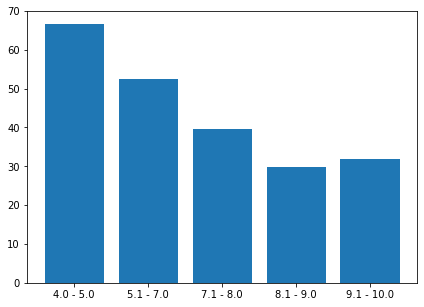

In [ ]:
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(grades_intervals.size), grades_intervals)
plt.bar(range(grades_intervals.size), grades_and_drop_out)  

То же самое сделаем для студентов с депрессией.

In [ ]:
grades_and_depression = {}
df_depression_and_grades = data_frame.loc[:, ['average_grade', 'depression']].set_index('average_grade')
for i in grades_intervals:
  answers = df_depression_and_grades.loc[i].value_counts()
  grades_and_depression[i] = int(answers.loc[True]) / (int(answers.loc[True]) + int(answers.loc[False])) * 100

grades_and_depression = Series(grades_and_depression)

<BarContainer object of 5 artists>

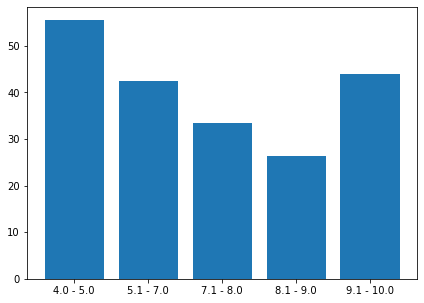

In [ ]:
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(grades_intervals.size), grades_intervals)
plt.bar(range(grades_intervals.size), grades_and_depression)  

Из полученных графиков видим, что количество студентов с депрессией и студентов, думавших об отчислении, обратно зависит от их среднего балла. 

Интересно, что для обоих графиков характерно увеличение процента студентов для интервала [9.1 - 10.0].

Чтобы подтвердить наличие этой обратной зависимости, найдем коэффициент корреляции Пирсона. 
Для этого закодируем интервалы успеваемости по возрастанию как числа от 0 до 4.

In [ ]:
from scipy import stats

encoded_intervals = np.array([])
j = 0
for i in grades_intervals:
  encoded_intervals = np.append(encoded_intervals, [(float(i.split(' - ')[0]) + float(i.split(' - ')[1])) / 2])

print('Коэффициент корреляции Пирсона между интервалом успеваемости и процентом студентов, думавших об отчислении: ', stats.pearsonr(encoded_intervals, np.array(grades_and_drop_out))[0])
print('Коэффициент корреляции Пирсона между интервалом успеваемости и процентом студентов с депрессией: ', stats.pearsonr(encoded_intervals, np.array(grades_and_depression))[0])

Коэффициент корреляции Пирсона между интервалом успеваемости и процентом студентов, думавших об отчислении:  -0.9701760598434188
Коэффициент корреляции Пирсона между интервалом успеваемости и процентом студентов с депрессией:  -0.6315476517243566


Полученные коэффициенты говорят о том, что между успеваемостью и процентом студентов, думавших об отчислении, существует сильная обратная связь. А между успеваемостью и процентом студентов с депрессией существует средняя обратная связь.

Немного объясним это с нашей стороны: большой процент людей с низкой успеваемостью, желающих отчислиться, вполне ожидаем. Существует довольно популярное мнение, что высшее образование в принципе не так важно (отсюда идут мысли об отчислении), соответсвенно у таких студентов будет более простое отношение к оценкам. 

А вот к обратной зависимости по проценту людей с депрессией я бы не стала относится серьезно. Кажется, что в нашем возрасте мало людей будет впадать в депрессию только из-за низкой успеваемости, такое заболевание будет сопроваждаться и другими причинами. Так что к этим полученным данным я бы отнеслась как к совпадению.


# Посещаемость и успеваемость

In [ ]:
attendance = data_frame.attendance.value_counts()
total = np.sum(np.array(attendance))
print('Процент студентов, посещающих все пары:', attendance.loc['Хожу на все пары'] / total * 100)
print('Процент студентов, пропускающих более 70% пар в неделю:', attendance.loc['Пропускаю >70% пар в неделю'] / total * 100)

Процент студентов, посещающих все пары: 30.34188034188034
Процент студентов, пропускающих более 70% пар в неделю: 7.264957264957266


Посмотрим, как меняется процент людей, посещающих все пары по разным группам успеваемости.

<BarContainer object of 5 artists>

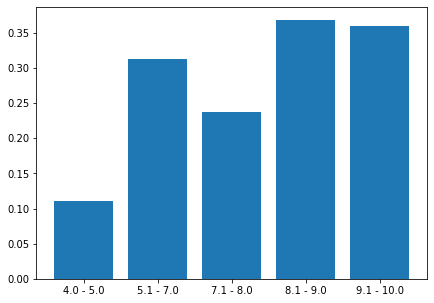

In [ ]:
grades_intervals = data_frame.average_grade.unique()
grades_intervals = np.sort(grades_intervals)
grades_and_full_attendance = {}
df_attendance_and_grades = data_frame.loc[:, ['average_grade', 'attendance']].set_index('average_grade')
for i in grades_intervals:
  answers = df_attendance_and_grades.loc[i].value_counts()
  total = np.sum(np.array(answers))
  grades_and_full_attendance[i] = int(answers.loc['Хожу на все пары']) / total

grades_and_full_attendance = Series(grades_and_full_attendance)
plt.figure(figsize=(7, 5))
plt.xticks(np.arange(grades_intervals.size), grades_intervals)
plt.bar(range(grades_intervals.size), grades_and_full_attendance)

Получили вполне ожидаемый результат, что среди студентов с более низкой успеваемостью меньше тех, кто ходит на все пары. То, что столбец [5.1 - 7.0] выше следующего за ним можно объяснить тем, что интервал [5.1 - 7.0] длинне, чем [7.1 - 8.0] (так уж вышло при сборе информации). Кажется, что будь они равномерными, график бы строго возрастал. 

#Анализ знаков зодиака

Для начала посмотрим на распределние знаков зодиака студентов:

In [ ]:
zodiac_signs = data_frame.zodiac_sign.value_counts()
zodiac_signs = zodiac_signs[['Овен', 'Телец', 'Близнецы',
                             'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
zodiac_signs

Овен        19
Телец       11
Близнецы    14
Рак         14
Лев         29
Дева        24
Весы        26
Скорпион    27
Стрелец     17
Козерог     31
Водолей     11
Рыбы        11
Name: zodiac_sign, dtype: int64

<BarContainer object of 12 artists>

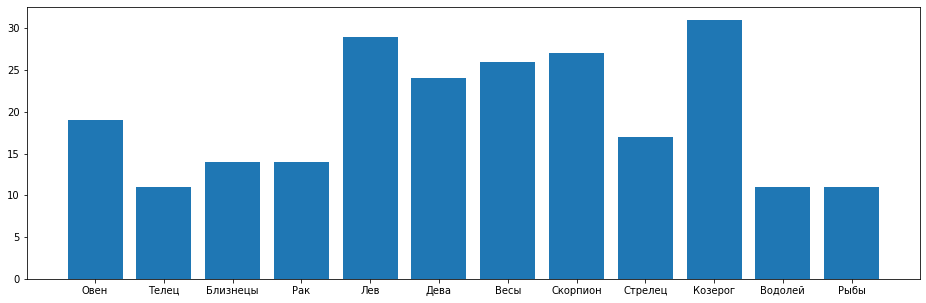

In [ ]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(zodiac_signs.index.size), zodiac_signs.index)
plt.bar(range(data_frame.zodiac_sign.unique().size), zodiac_signs)

Чаще всего встречаются Львы и Козероги, а вот меньше всего - Водолеи, Рыбы и Тельцы.



---



А теперь узнаем кто же лучше всех учится!

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign'])['average_grade'].value_counts()
zodiac_sign_mean = {}
for i in grouped_data.index:
  zodiac_sign_mean[i[0]] = zodiac_sign_mean.get(i[0], 0) + (float(i[1].split(' - ')[0]) + float(i[1].split(' - ')[1]))/2 * grouped_data[i]
for zodiac_sign in zodiac_sign_mean:
  zodiac_sign_mean[zodiac_sign] /= zodiac_signs[zodiac_sign]
zodiac_sign_mean = pd.Series(zodiac_sign_mean)
zodiac_sign_mean = zodiac_sign_mean[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]

<BarContainer object of 12 artists>

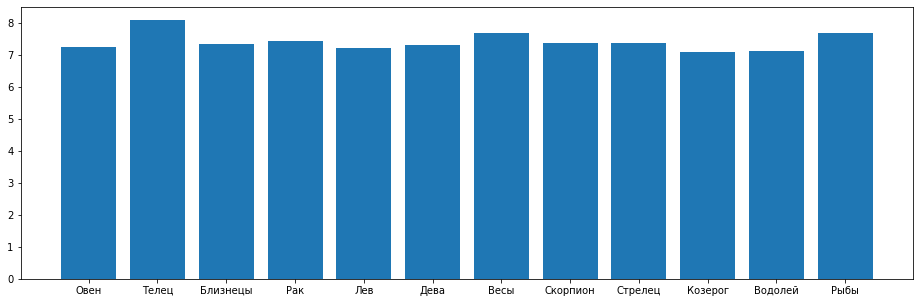

In [ ]:
plt.figure(figsize=(16, 5))
plt.xticks(np.arange(zodiac_sign_mean.index.size), zodiac_sign_mean.index)
plt.bar(range(data_frame.zodiac_sign.unique().size), zodiac_sign_mean)  

Как видно, особо никто не выделяется :)

---



Какой из знаков зодиака меньше всего курит?

Посмотрим, какой из знаков зодиака имеет больший процент курящих:

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['smoke'].value_counts(normalize = True)['Не курю'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.526316
Телец       0.636364
Близнецы    0.714286
Рак         0.857143
Лев         0.655172
Дева        0.666667
Весы        0.615385
Скорпион    0.666667
Стрелец     0.647059
Козерог     0.645161
Водолей     0.545455
Рыбы        0.545455
dtype: float64


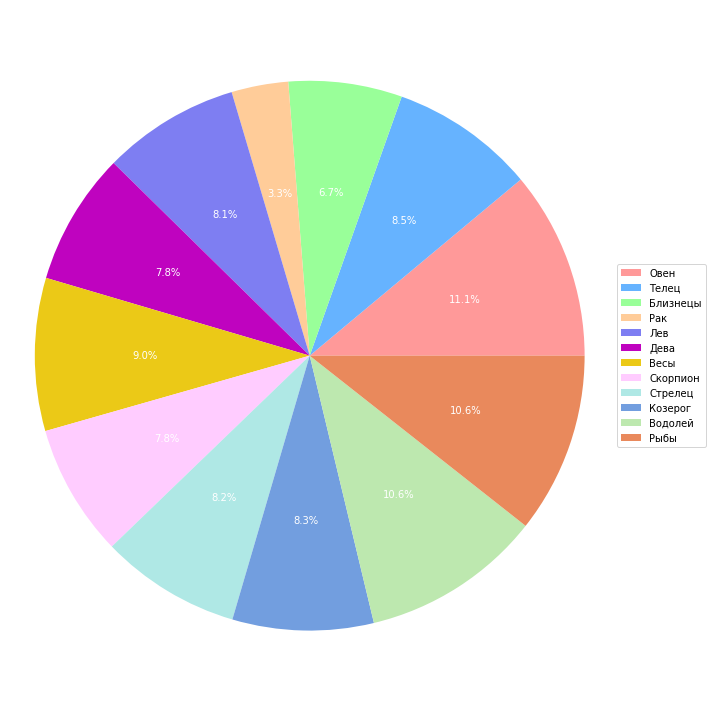

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Как видно, от знака зодиака не зависит (внезапно) желание курить.
Тем не менее, самым курящим знаком оказался Овен, а вот не курящим - Рак. (потому что зачем им ещё один?)

Теперь посмотрим на статистику употребления алкоголя:

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['alcohol'].value_counts(normalize = True)['Не пью'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.315789
Телец       0.363636
Близнецы    0.357143
Рак         0.500000
Лев         0.379310
Дева        0.375000
Весы        0.346154
Скорпион    0.370370
Стрелец     0.352941
Козерог     0.387097
Водолей     0.181818
Рыбы        0.181818
dtype: float64


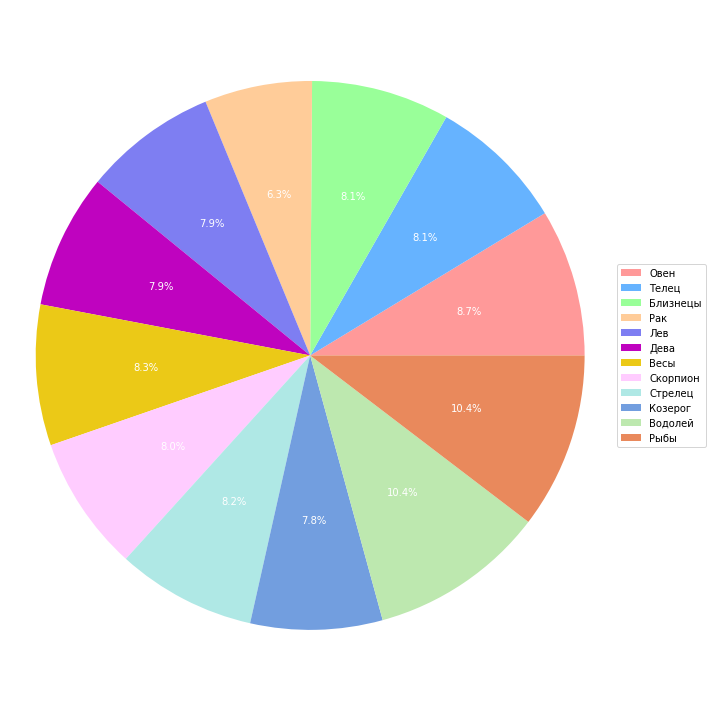

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

И первое место разделили Водолеи и Рыбы. А вот Раки продолжают придерживаться здорового образа жизни :)

Рассмотрим теперь психическое состояние знаков зодиака.
Какой знак зодиака чаще всего сталкивался с депрессией?

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['depression'].value_counts(normalize = True)[True])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.368421
Телец       0.363636
Близнецы    0.214286
Рак         0.142857
Лев         0.413793
Дева        0.500000
Весы        0.384615
Скорпион    0.444444
Стрелец     0.352941
Козерог     0.290323
Водолей     0.454545
Рыбы        0.363636
dtype: float64


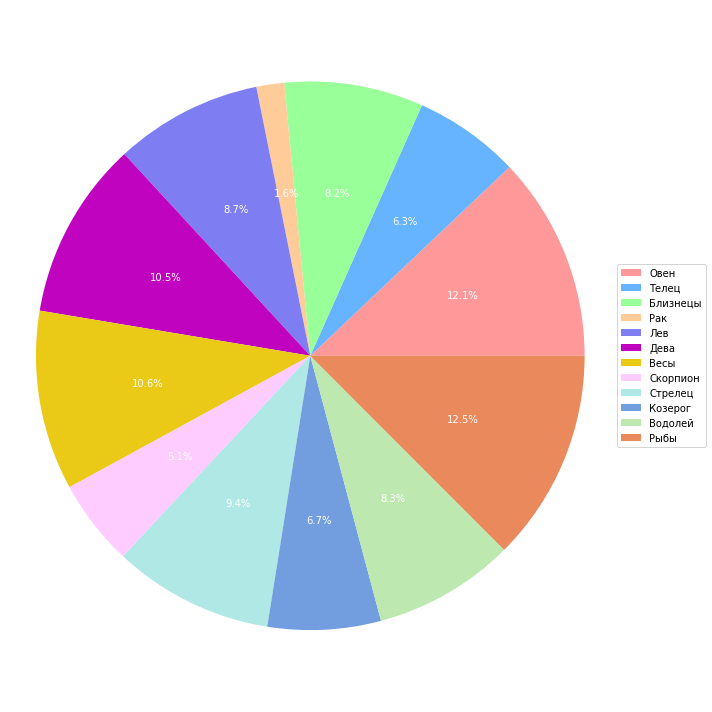

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Овны и Рыбы...
Будем надеятся, что у них всё будет хорошо.

И наконец самое интересное: какой знак зодиака самый любимый?


In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['relationship'].value_counts(normalize = True)[True])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

zodiac_sign
Овен        0.526316
Телец       0.272727
Близнецы    0.357143
Рак         0.071429
Лев         0.379310
Дева        0.458333
Весы        0.461538
Скорпион    0.222222
Стрелец     0.411765
Козерог     0.290323
Водолей     0.363636
Рыбы        0.545455
dtype: float64


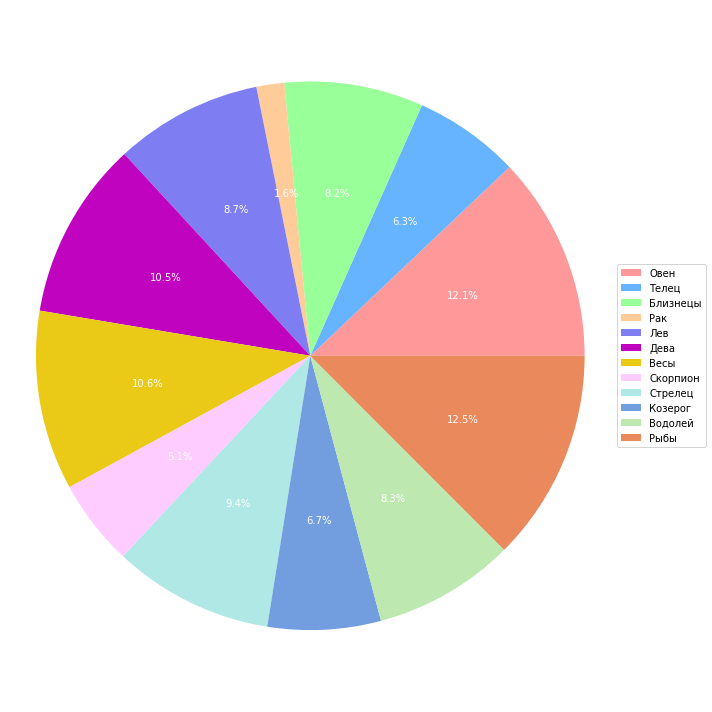

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Овны и Рыбы на рассхват, а вот Ракам не повезло :(

Bonus: какой знак зодиака чаще всего отправляют на пересдачу?

In [ ]:
grouped_data = data_frame.groupby(by = ['zodiac_sign']).apply(lambda x: x['failed_exams'].value_counts(normalize = True)['Не пересдавал(а)'])
grouped_data = grouped_data[['Овен', 'Телец', 'Близнецы',
                              'Рак', 'Лев', 'Дева',
                             'Весы', 'Скорпион', 'Стрелец',
                             'Козерог', 'Водолей', 'Рыбы']]
print(grouped_data)

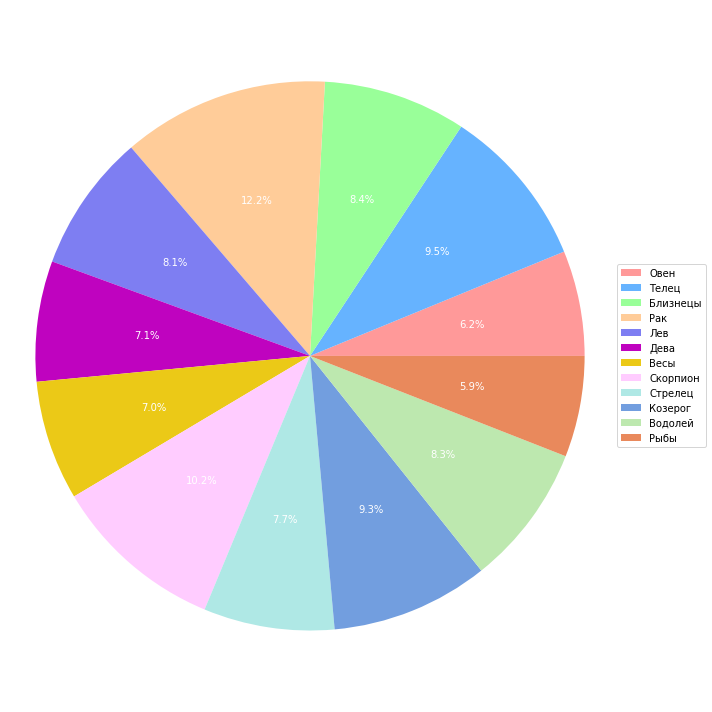

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
def func(pct):
    absolute = int(np.round(pct*100))
    return "{:.1f}%".format(pct, absolute)

labels = ['Овен', 'Телец', 'Близнецы', 'Рак', 'Лев', 'Дева',
          'Весы', 'Скорпион', 'Стрелец', 'Козерог', 'Водолей', 'Рыбы']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',
          '#7e7ef2', '#bf03bf', '#ebc917', '#ffccff',
          '#afe8e5', '#729edf', '#bde8af', '#e9895c']
wedges, texts, autotexts = ax.pie(1 - grouped_data.values, colors = colors, autopct = lambda pct: func(pct),
                                  textprops=dict(color="w"))


plt.legend(wedges, labels,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

Удивительно, но чаще всего валят Раков... 

Этот анализ прововодился в шутку, хотя некоторые интересные закономерности были выявлены!

# Правда ли блондины не блещут интелектом? 

In [ ]:
df = data_frame
df = df[['blond', 'average_grade']]
blond_grades = df[df['blond'] == True]
not_blond_grades = df[df['blond'] == False]
print("число блондинов - ", blond_grades.blond.size)
print("число не блондинов - ", not_blond_grades.blond.size)

число блондинов -  45
число не блондинов -  189


*Натуральный блондин, на всю страну такой один...*

![](https://s.mediasole.ru/images/736/736885/original.jpg)

Для исследования нам предоставли данные 45 блондинов и 189 не блондинов, итого имеем, что 19.2% всех подопытных являются обладателями светлых голов. Что можно считать хорошей выборкой, тк всего в мире окло 14% блондинов, что близко к нашему числу.

4.0 - 5.0      4
5.1 - 7.0     14
7.1 - 8.0      9
8.1 - 9.0     12
9.1 - 10.0     6
Name: average_grade, dtype: int64
4.0 - 5.0     0.088889
5.1 - 7.0     0.311111
7.1 - 8.0     0.200000
8.1 - 9.0     0.266667
9.1 - 10.0    0.133333
Name: average_grade, dtype: float64


<BarContainer object of 5 artists>

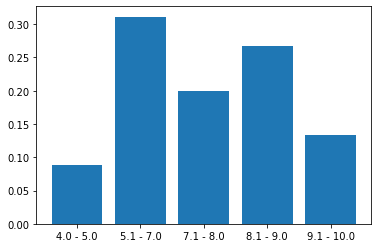

In [ ]:
grades = blond_grades.average_grade.value_counts()
grades = grades.reindex(['4.0 - 5.0', '5.1 - 7.0','7.1 - 8.0', '8.1 - 9.0', '9.1 - 10.0'])
print(grades)
max_grade = np.sum(grades.values)
grades = grades / max_grade
print(grades)
plt.xticks(np.arange(grades.index.size), grades.index)
plt.bar(range(blond_grades.average_grade.unique().size), grades)

4.0 - 5.0      5
5.1 - 7.0     66
7.1 - 8.0     54
8.1 - 9.0     45
9.1 - 10.0    19
Name: average_grade, dtype: int64
4.0 - 5.0     0.026455
5.1 - 7.0     0.349206
7.1 - 8.0     0.285714
8.1 - 9.0     0.238095
9.1 - 10.0    0.100529
Name: average_grade, dtype: float64


<BarContainer object of 5 artists>

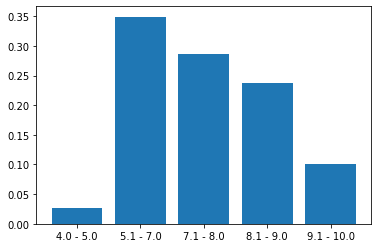

In [ ]:
grades1 = not_blond_grades.average_grade.value_counts()
grades1 = grades1.reindex(['4.0 - 5.0', '5.1 - 7.0','7.1 - 8.0', '8.1 - 9.0', '9.1 - 10.0'])
print(grades1)
max_grade1 = np.sum(grades1.values)
grades1 = grades1 / max_grade1
print(grades1)
plt.xticks(np.arange(grades1.index.size), grades1.index)
plt.bar(range(not_blond_grades.average_grade.unique().size), grades1)

Имеем очень похожие графики с общими оценками. Заметим лишь, что 10% не блондинов учатся на 9.0-10.0, и соответственно 13% блондинов на 9.0-10.0.

Index(['gender', 'faculty', 'average_grade', 'study_time', 'zodiac_sign',
       'alcohol', 'smoke', 'coffee', 'work', 'attendance', 'sleep',
       'expulsion', 'depression', 'covid19', 'library_attendance',
       'person_type', 'student_union', 'hobby', 'relationship', 'sport',
       'education_type', 'failed_exams'],
      dtype='object')
gender
Blond


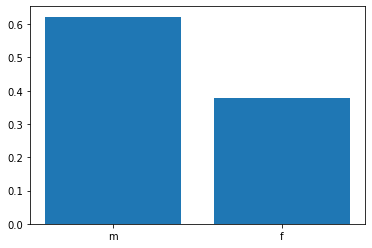

Not blond


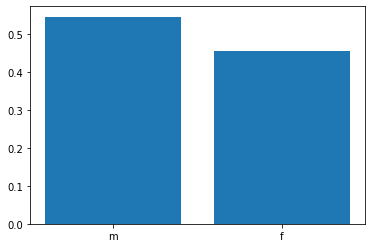

faculty
Blond


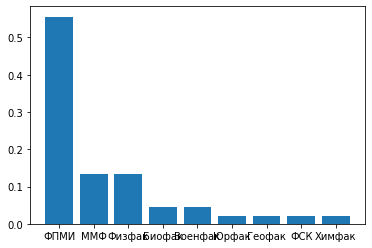

Not blond


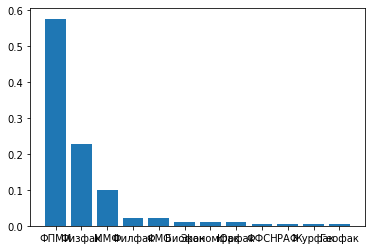

average_grade
Blond


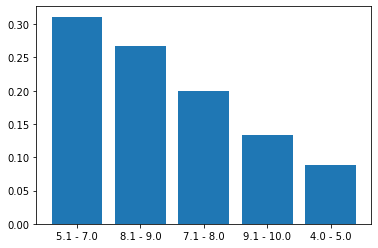

Not blond


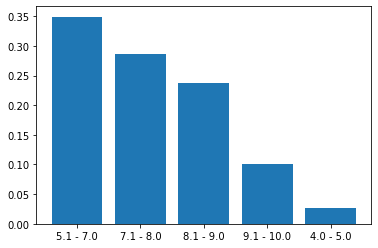

study_time
Blond


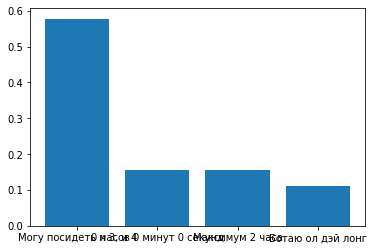

Not blond


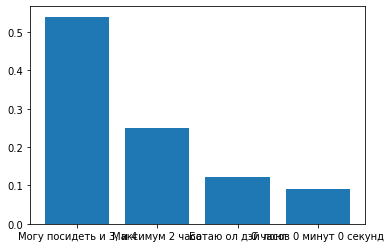

zodiac_sign
Blond


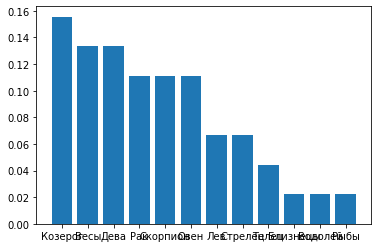

Not blond


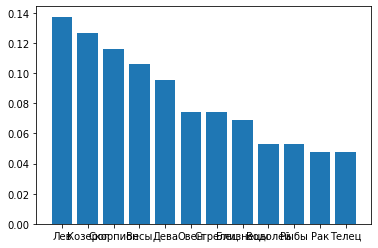

alcohol
Blond


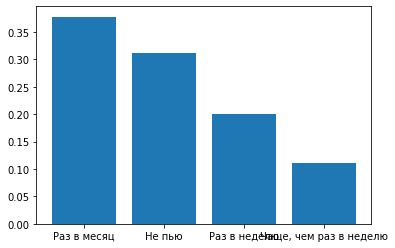

Not blond


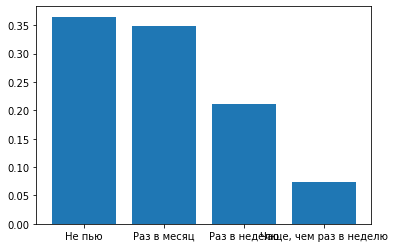

smoke
Blond


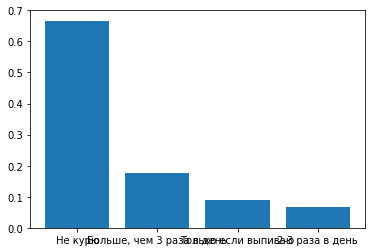

Not blond


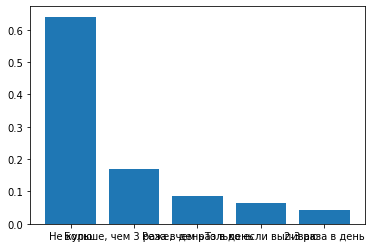

coffee
Blond


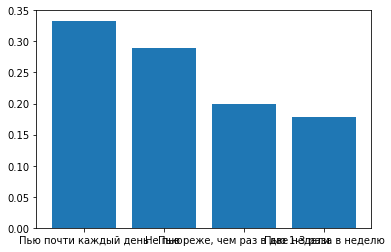

Not blond


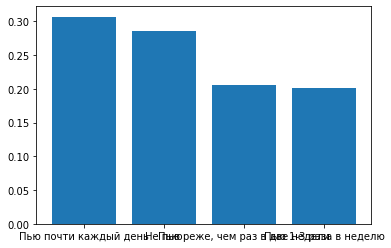

work
Blond


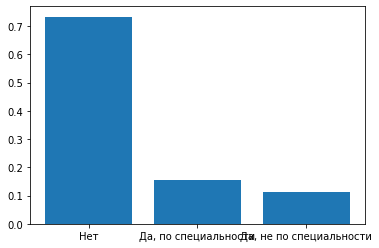

Not blond


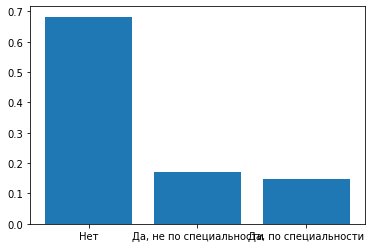

attendance
Blond


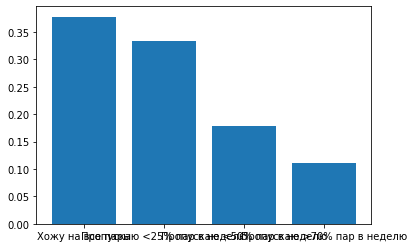

Not blond


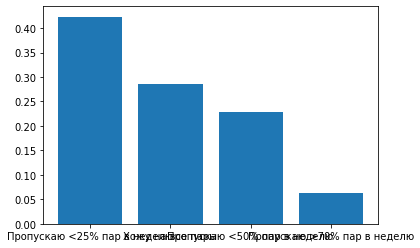

sleep
Blond


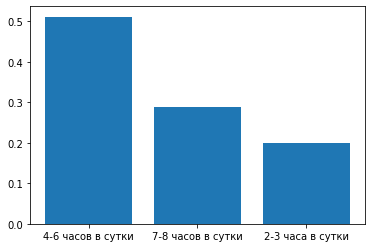

Not blond


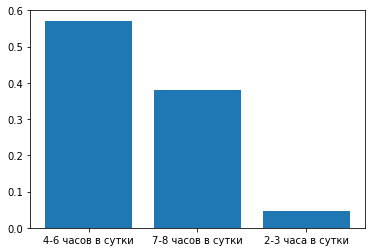

expulsion
Blond


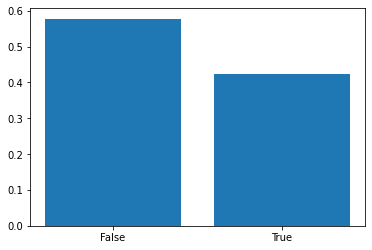

Not blond


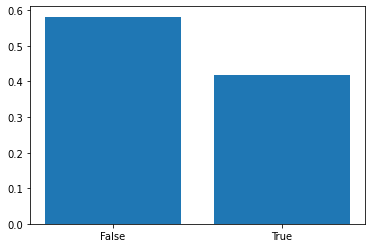

depression
Blond


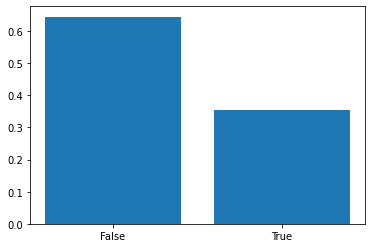

Not blond


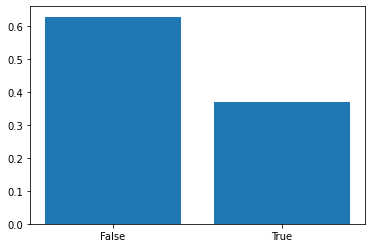

covid19
Blond


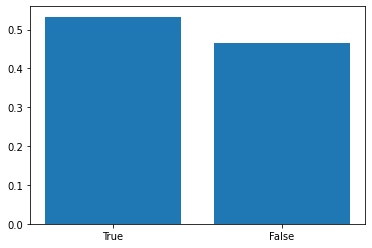

Not blond


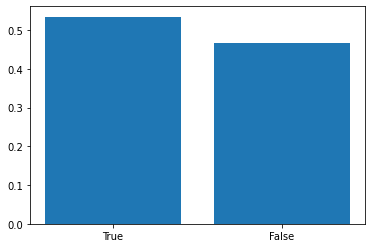

library_attendance
Blond


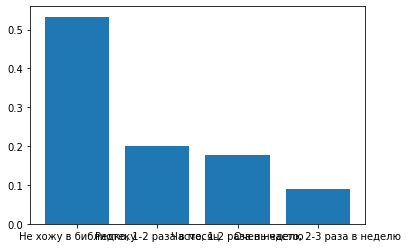

Not blond


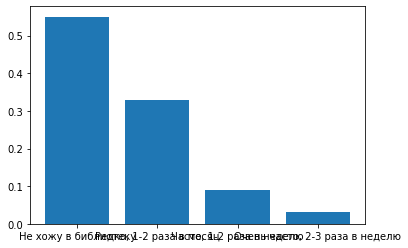

person_type
Blond


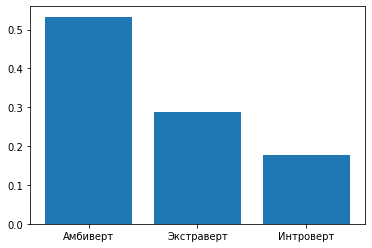

Not blond


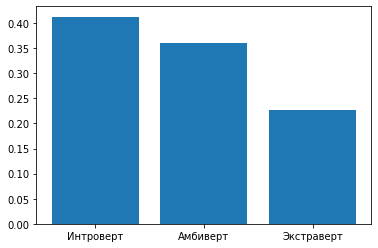

student_union
Blond


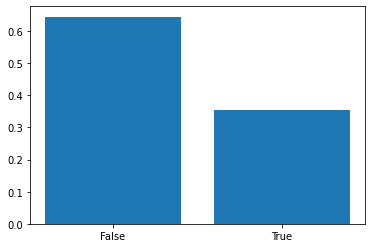

Not blond


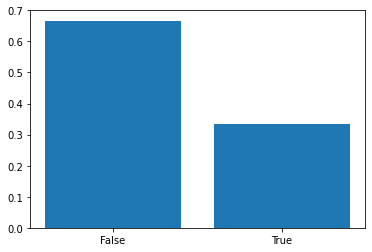

hobby
Blond


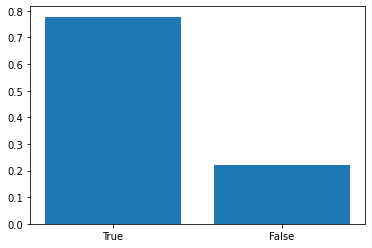

Not blond


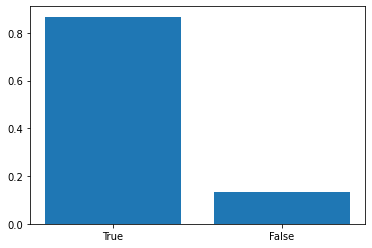

relationship
Blond


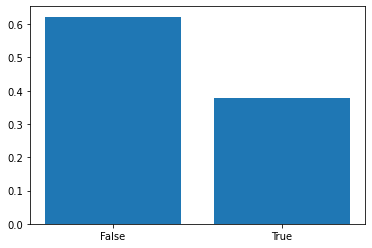

Not blond


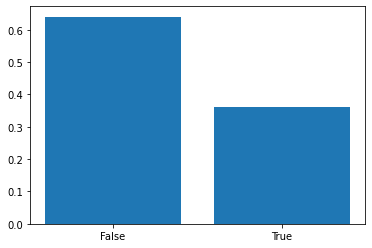

sport
Blond


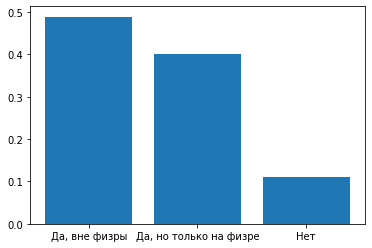

Not blond


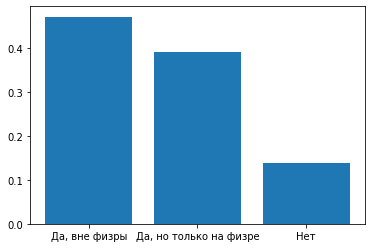

education_type
Blond


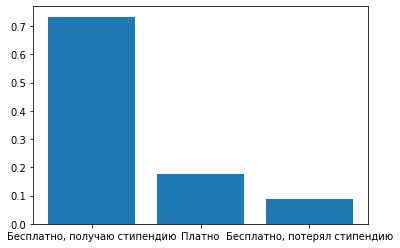

Not blond


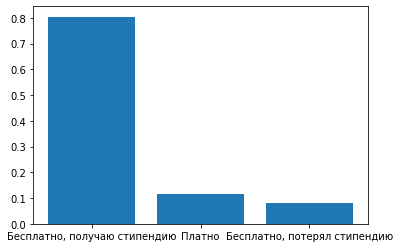

failed_exams
Blond


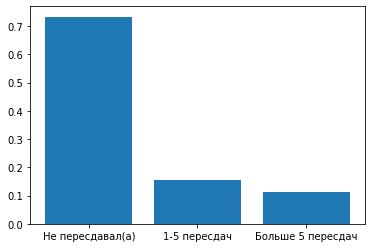

Not blond


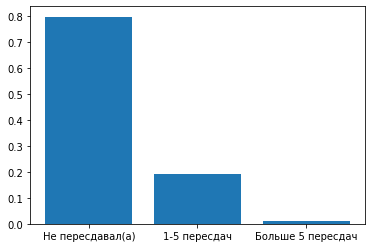

In [ ]:
columns = data_frame.columns
columns = np.delete(columns, 22)
print(columns)
for column in columns:
  print(column)
  df = data_frame
  df = df[['blond', column]]
  blond_df = df[df['blond'] == True]
  blond_df.name = "Blond"
  not_blond_df = df[df['blond'] == False]
  not_blond_df.name = "Not blond"


  for df in [blond_df, not_blond_df]:
    print(df.name)
    values = df[column].value_counts()
    num_of_people = np.sum(values.values)
    values = values / num_of_people
    plt.xticks(np.arange(values.index.size), values.index)
    plt.bar(range(df[column].unique().size), values)
    plt.show()

В результате исследования было обнаружено, что большинство характеристик блондинов совпадает, однако нашлись 2 по которым видны явные различия.

Blond
Хожу на все пары               0.377778
Пропускаю <25% пар в неделю    0.333333
Пропускаю <50% пар в неделю    0.177778
Пропускаю >70% пар в неделю    0.111111
Name: attendance, dtype: float64


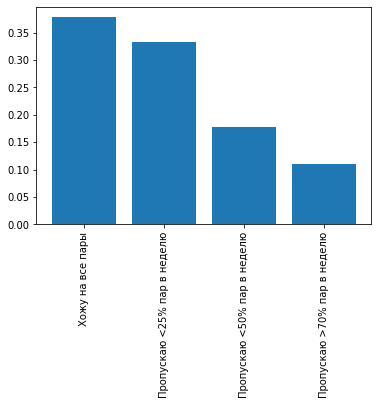

Not blond
Пропускаю <25% пар в неделю    0.423280
Хожу на все пары               0.285714
Пропускаю <50% пар в неделю    0.227513
Пропускаю >70% пар в неделю    0.063492
Name: attendance, dtype: float64


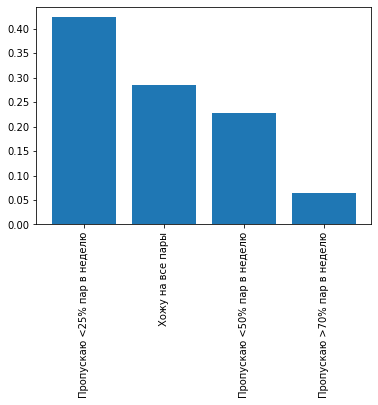

Blond
Амбиверт      0.533333
Экстраверт    0.288889
Интроверт     0.177778
Name: person_type, dtype: float64


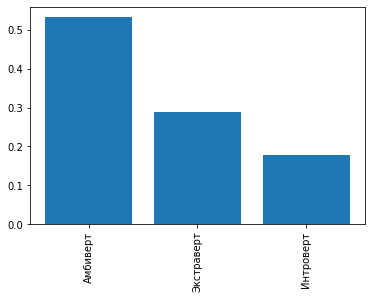

Not blond
Интроверт     0.412698
Амбиверт      0.359788
Экстраверт    0.227513
Name: person_type, dtype: float64


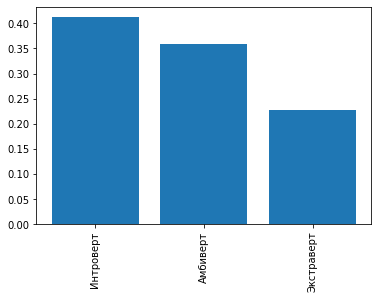

In [ ]:
columns = np.array(['attendance', 'person_type'])
for column in columns:
  df = data_frame
  df = df[['blond', column]]
  blond_df = df[df['blond'] == True]
  blond_df.name = "Blond"
  not_blond_df = df[df['blond'] == False]
  not_blond_df.name = "Not blond"
  

  for df in [blond_df, not_blond_df]:
    print(df.name)
    values = df[column].value_counts()
    num_of_people = np.sum(values.values)
    values = values / num_of_people
    print(values)
    plt.xticks(np.arange(values.index.size), values.index, rotation = 90)
    plt.bar(range(df[column].unique().size), values)
    plt.show()

На диаграммах явно видно, что число экстравертов и амбивертов среди блондинов больше, поэтому эти ребята и на пары ходят чаще)

Blond


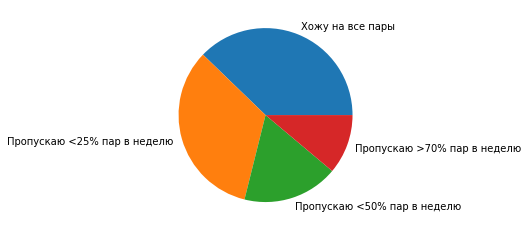

Not blond


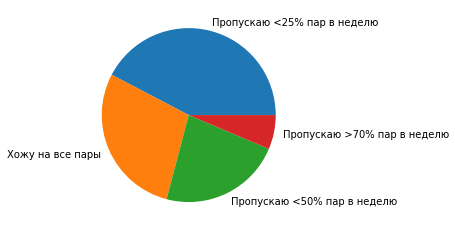

Blond


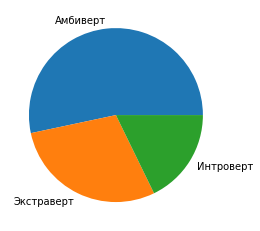

Not blond


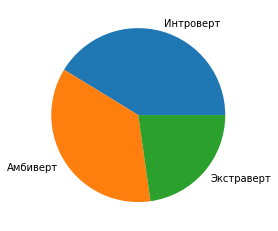

In [ ]:
columns = np.array(['attendance', 'person_type'])
for column in columns:
  df = data_frame
  df = df[['blond', column]]
  blond_df = df[df['blond'] == True]
  blond_df.name = "Blond"
  not_blond_df = df[df['blond'] == False]
  not_blond_df.name = "Not blond"


  for df in [blond_df, not_blond_df]:
    print(df.name)
    values = df[column].value_counts()
    num_of_people = np.sum(values.values)
    values = values / num_of_people
    plt.pie(values.values, labels = values.index)
    plt.show()